Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = ""

---

# Интерполяция при помощи полиномов Лагранжа.

In [1]:
import numpy as np

def letin(x, f):
    return f(x)

def prod(it):
    acc = 1
    for x in it:
        acc *= x
    return acc

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """

        def lbp(j, x):
            return prod(
                letin(self.xk[m], lambda xm:
                      (x - xm) / (self.xk[j] - xm))
                for m in range(len(self.xk)) if m != j)

        return sum(self.yk[j] * lbp(j, x) for j in range(len(self.xk)))

In [2]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

Рассмотрим функцию Рунге $1/(1 + 25x^2)$. Интерполируйте данную функцию на интервале $x\in [-2, 2]$, используя полиномы Лагранжа степени $m$, где $m=3, 5, 7, 11$. Используйте равномерную сетку. Постройте результат интерполяции вместе с $f(x)$.

Повторите предыдущее задание используя узлы Чебышева. Сравните качество интерполяции на равномерной сетке и на узлах Чебышева.


Err for 3  = 0.810891089108911
Err for 5  = 0.6148307173740215
Err for 7  = 0.8768773678751691
Err for 11 = 4.340324479780285


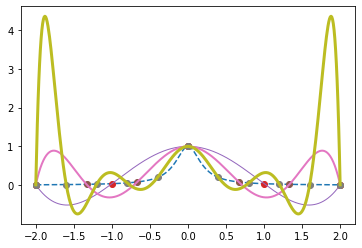

In [14]:
import matplotlib.pyplot as plt

def func_diff(f, g, xs):
    return max(np.abs(f(xs) - g(xs)))

xs0 = np.arange(-2, 2.01, 0.01)
plt.plot(xs0, runge_func(xs0), '--')

for lw, m in enumerate([3, 5, 7, 11]):
    xs = np.linspace(-2, 2, m)
    ys = runge_func(xs)
    lp = LagrangeInterpolator(xs, ys)

    plt.plot(xs, ys, 'o')
    plt.plot(xs0, lp(xs0), lw=lw)

    print(f'Err for {m:<2} = {func_diff(runge_func, lp, xs0)}')

Err for 3  = 0.7837199333174566
Err for 5  = 0.6503396269903499
Err for 7  = 0.5370970989899216
Err for 11 = 0.3593140803406302


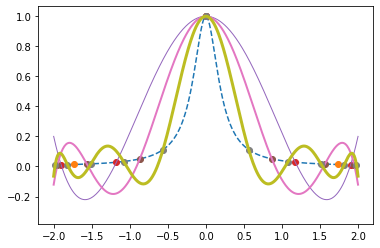

In [15]:
def chebyshevs(a, b, n):
    return (a + b) / 2 + (b - a) / 2 * np.cos(np.pi / (2 * n) * (2 * np.arange(1, n + 1, 1) - 1))

xs0 = np.arange(-2, 2.01, 0.01)
plt.plot(xs0, runge_func(xs0), '--')

for lw, m in enumerate([3, 5, 7, 11]):
    xs = chebyshevs(-2, 2, m)
    ys = runge_func(xs)
    lp = LagrangeInterpolator(xs, ys)

    plt.plot(xs, ys, 'o')
    plt.plot(xs0, lp(xs0), lw=lw)

    print(f'Err for {m:<2} = {func_diff(runge_func, lp, xs0)}')